# Importing tools

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# loading and seeing the description

In [2]:
cancer=load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


# Splitting Datasets into Train & Test

In [4]:
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)

# Creating an instance of KNN classifier and trainig

In [5]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# predicting on test dataset

In [6]:
print('Accuracy of KNN n=5 on the training dataset is :{: .3f}'.format(knn.score(X_train,y_train)))
print('Accuracy of KNN n=5 on the testing dataset is :{: .3f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN n=5 on the training dataset is : 0.946
Accuracy of KNN n=5 on the testing dataset is : 0.930


# Finding the best n in KNN

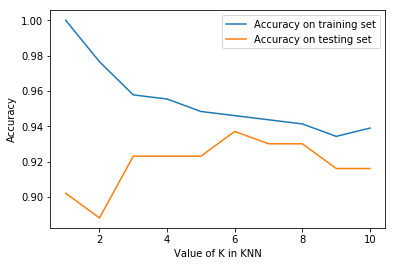

In [16]:
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=66)

k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

### Here n in KNN is 6

In [8]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=6 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN n=6 on the testing dataset is :0.937
